## Name: Shail K Shah
## USC ID: 9975958845
## GitHub username: anonshail

### All Imports


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, auc, roc_curve, RocCurveDisplay, mean_squared_error
from imblearn.ensemble import BalancedRandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
import collections
from imblearn.pipeline import Pipeline as imbpipeline
import matplotlib.lines as mlines

import warnings
warnings.filterwarnings('ignore')

### 1. Tree-Based Methods

### 1.a Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks. The dataset contains a training set and a test set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are numeric.

### 1.b Data Preparation
### This data set has missing values. When the number of data with missing values is significant, discarding them is not a good idea.

### 1.b.i Research what types of techniques are usually used for dealing with data with missing values. Pick at least one of them and apply it to this data in the next steps.

Some of the data imputation methods are as follows:

1) Imputation Using (Mean/Median) Values:
This can be done by calculating the mean or median value of the available data and make use of this value in the place of missing data.

2) Imputation Using (Most Frequent) or (Zero/Constant) Values:
This method of data imputation works by replacing the missing values with the most frequent value in the available data.

3) Imputation Using k-NN:
In this method, we make use of the kNN algorithm to predict the value of missing data. This means that the missing column values are calculated based on how closely it resembles other points in the training set based on the known column data.

In [2]:
#reading the data
training_data = pd.read_csv('../data/aps_failure_training_set.csv', na_values=['na'])
test_data = pd.read_csv('../data/aps_failure_test_set.csv', na_values=['na'])

# imputation using mean
data = pd.concat([training_data, test_data], ignore_index=True)
data = data.fillna(training_data.mean())

# splitting dataframe by row index
training_data = data.iloc[:60000,:]
test_data = data.iloc[60000:,:]

print("Training data after replacing missing values with mean:")
training_data

Training data after replacing missing values with mean:


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,0.713189,6.640000e+02,186.000000,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,0.713189,2.130707e+09,224.000000,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.000000,2.130706e+09,18.000000,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,0.713189,2.130706e+09,494.000000,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [3]:
print("Test data after replacing missing values with mean:")
test_data

Test data after replacing missing values with mean:


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
60000,neg,60,0.000000,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
60001,neg,82,0.000000,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
60002,neg,66002,2.000000,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
60003,neg,59816,0.713189,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
60004,neg,1814,0.713189,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,neg,81852,0.713189,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
75996,neg,18,0.000000,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
75997,neg,79636,0.713189,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
75998,neg,110,0.713189,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


### 1.b.ii For each of the 170 features, calculate the coefficient of variation CV = s/m, where s is sample standard deviation and m is sample mean.

In [4]:
features = data.iloc[:,1:]
cv = [(np.std(data[column]) / np.mean(data[column]), column) for column in features]
cv

[(4.328579357658981, 'aa_000'),
 (2.207336846722729, 'ab_000'),
 (2.167784157381825, 'ac_000'),
 (193.9540311612, 'ad_000'),
 (22.28211642321542, 'ae_000'),
 (18.196878145413464, 'af_000'),
 (91.35068568819528, 'ag_000'),
 (42.17479945753106, 'ag_001'),
 (17.648270842664708, 'ag_002'),
 (8.758596487937998, 'ag_003'),
 (5.476635361461289, 'ag_004'),
 (2.9646350702296984, 'ag_005'),
 (2.3527075364256382, 'ag_006'),
 (2.8125739020799587, 'ag_007'),
 (6.275086220435788, 'ag_008'),
 (32.176614044802015, 'ag_009'),
 (2.315834591830549, 'ah_000'),
 (18.51785499433237, 'ai_000'),
 (43.153259522161605, 'aj_000'),
 (78.55947609922897, 'ak_000'),
 (9.11584087433884, 'al_000'),
 (9.070989441381284, 'am_0'),
 (2.254500874298183, 'an_000'),
 (2.276374773716262, 'ao_000'),
 (3.0863561258186714, 'ap_000'),
 (2.8538791857852988, 'aq_000'),
 (10.565158252077168, 'ar_000'),
 (114.46362820932701, 'as_000'),
 (23.192706061156166, 'at_000'),
 (86.29301307142197, 'au_000'),
 (5.736332005342614, 'av_000'),
 (

### 1.b.iii Plot a correlation matrix for your features using pandas or any other tool.

In [5]:
plt.figure(figsize=(110,110))
sns.heatmap(features.corr())
plt.show()

### 1.b.iv Pick √170 features with highest CV, and make scatter plots and box plots for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.

In [6]:
cv.sort(reverse = True)
selected_features = cv[:math.floor(math.sqrt(170))]
selected_features

[(194.43704350739245, 'cf_000'),
 (194.08789141767502, 'co_000'),
 (193.9540311612, 'ad_000'),
 (193.04376479958296, 'cs_009'),
 (120.08411045140494, 'dj_000'),
 (116.13740819984295, 'df_000'),
 (114.46362820932701, 'as_000'),
 (111.94565976545415, 'dh_000'),
 (91.35068568819528, 'ag_000'),
 (86.29301307142197, 'au_000'),
 (78.55947609922897, 'ak_000'),
 (77.89401217527244, 'az_009'),
 (77.45725130705509, 'ay_009')]

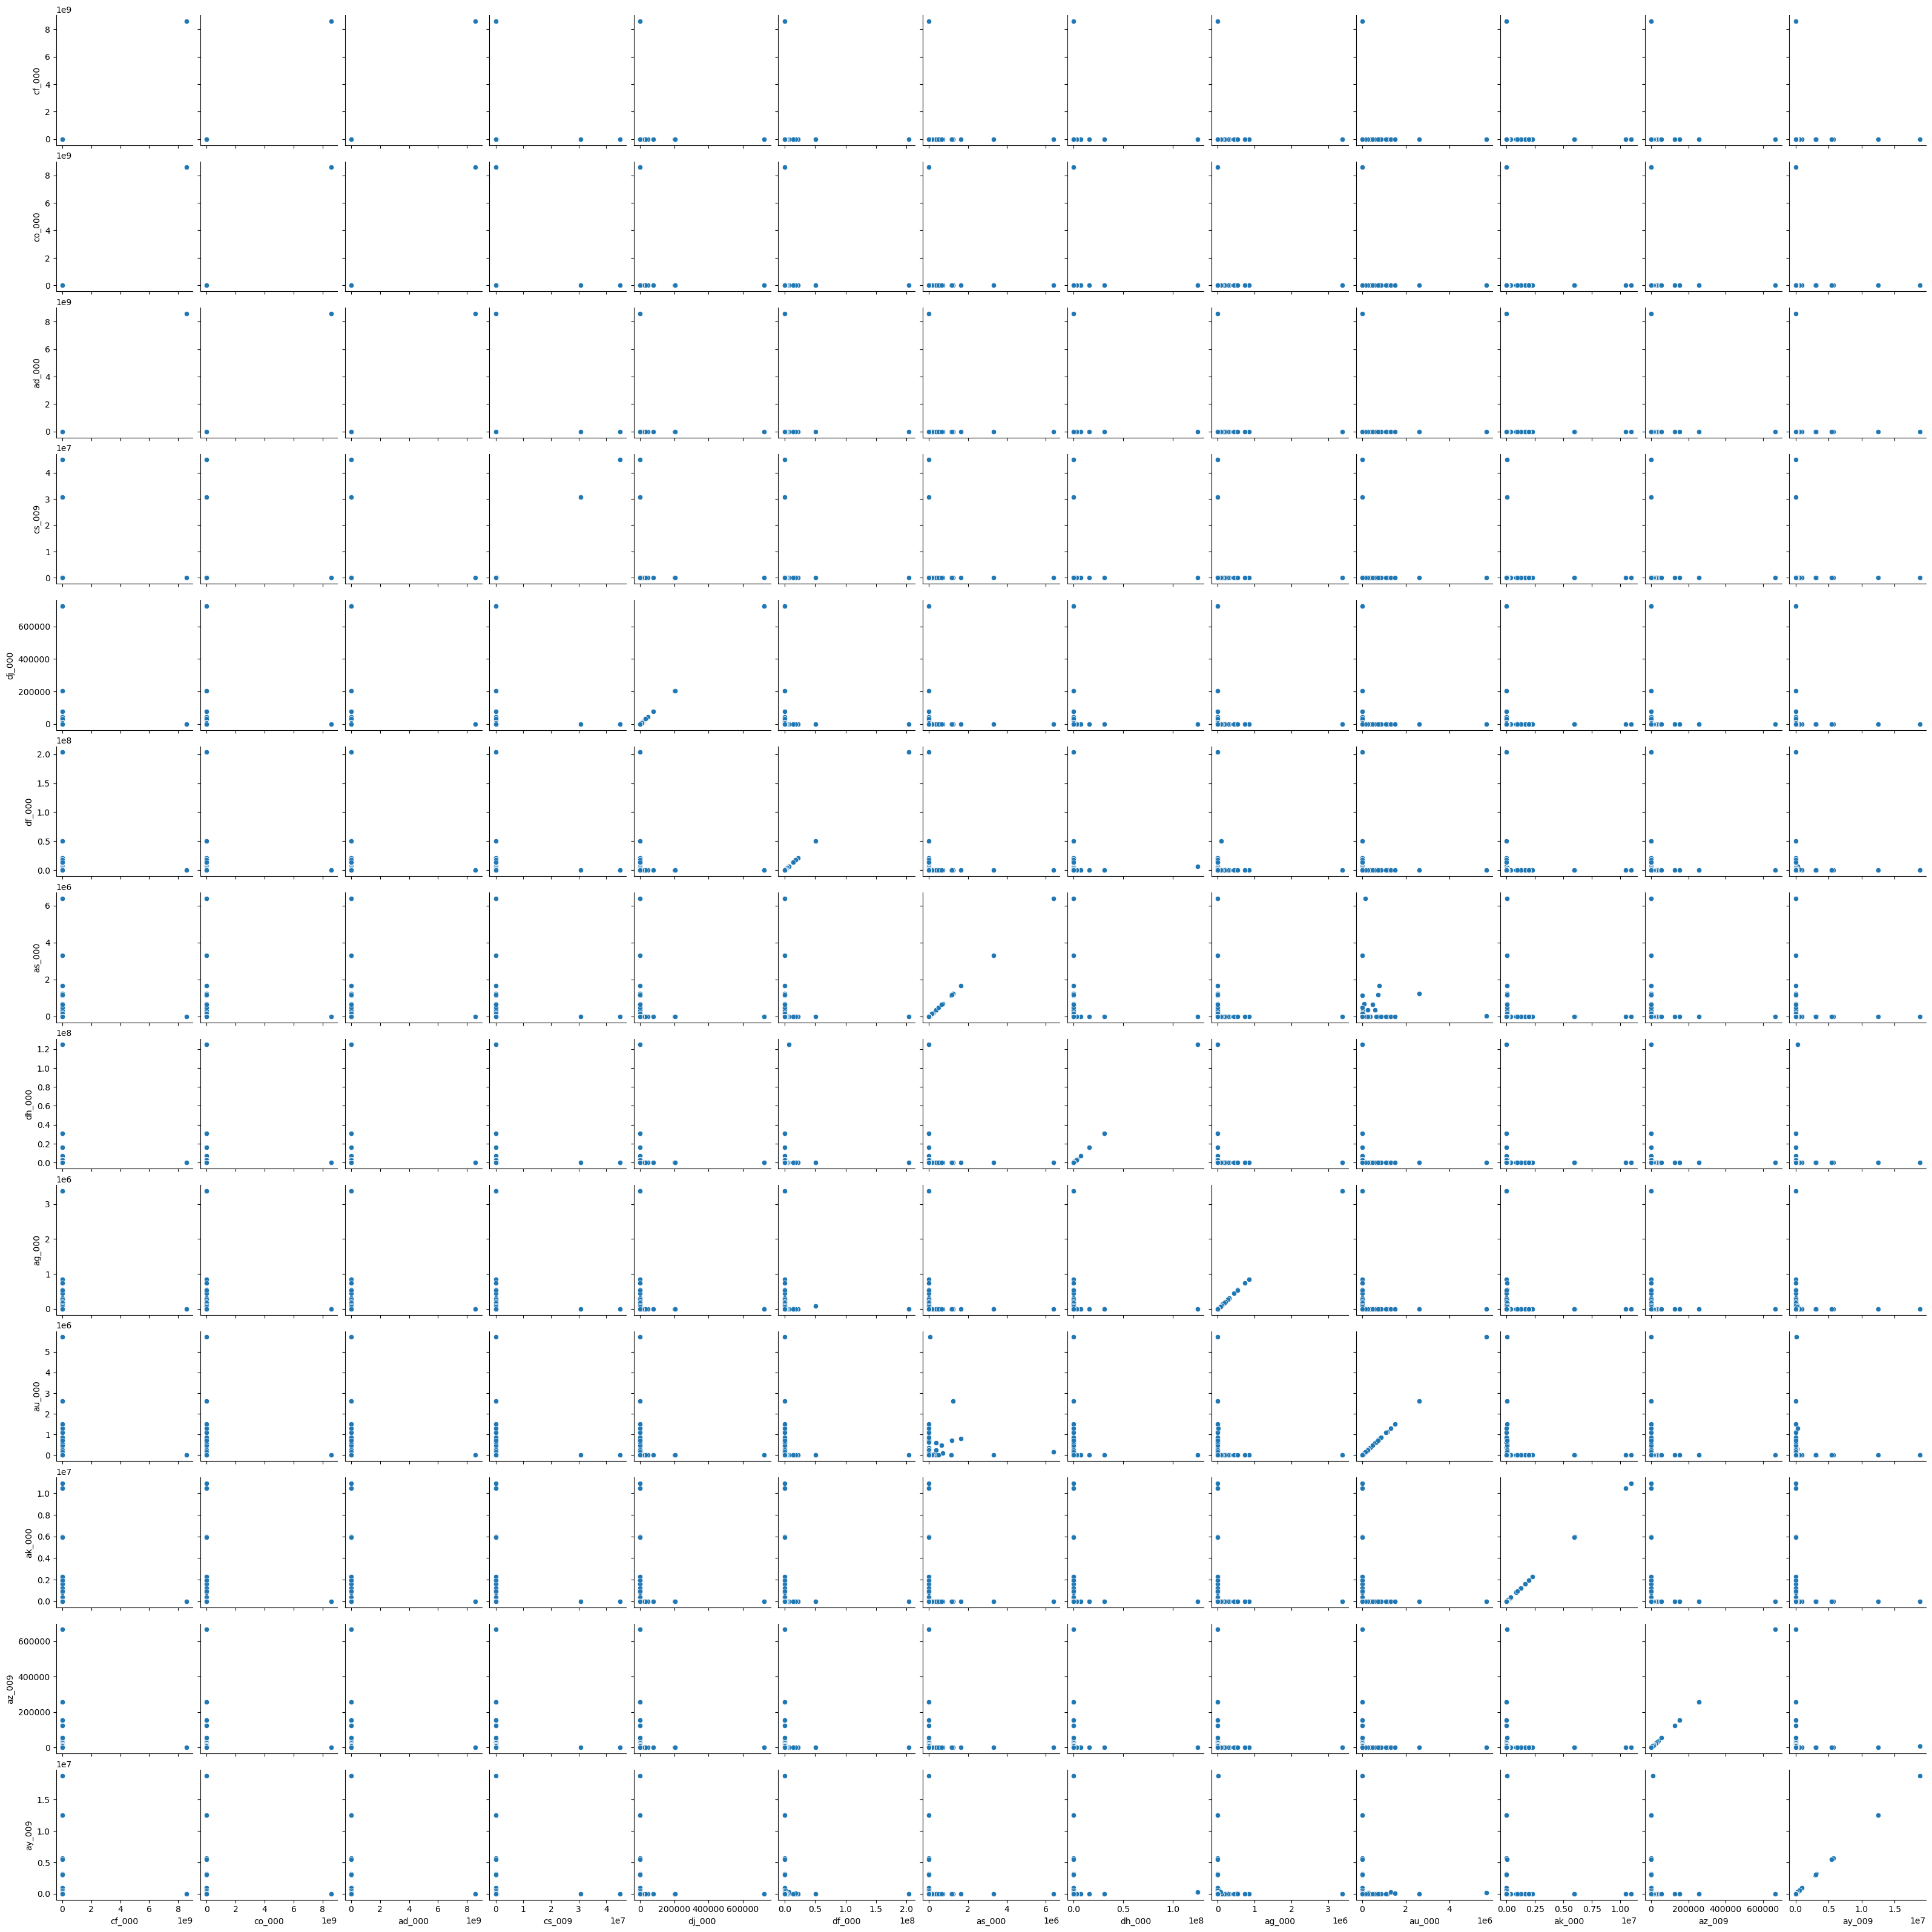

In [7]:
selected_feature_names = [sf[1] for sf in selected_features]
sns.pairplot(data[selected_feature_names], diag_kind=None)
plt.show()

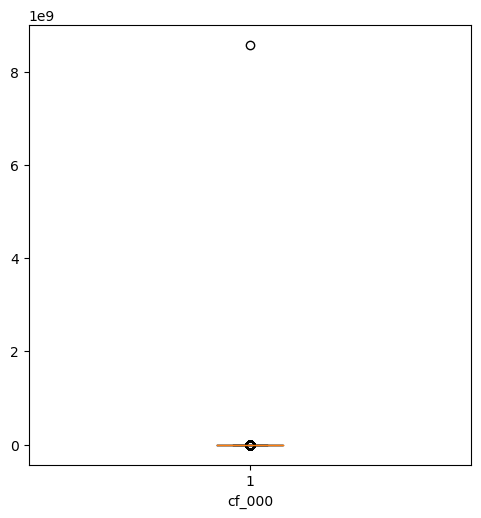

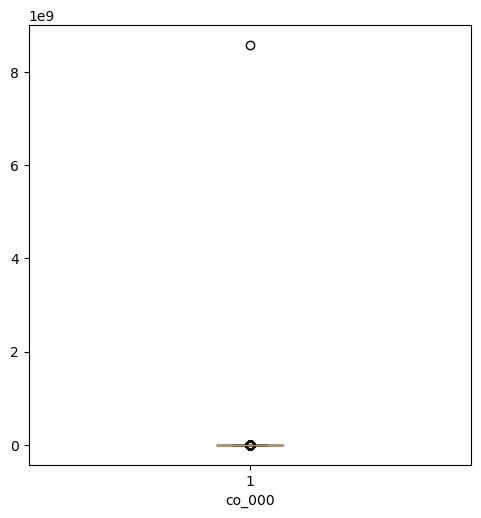

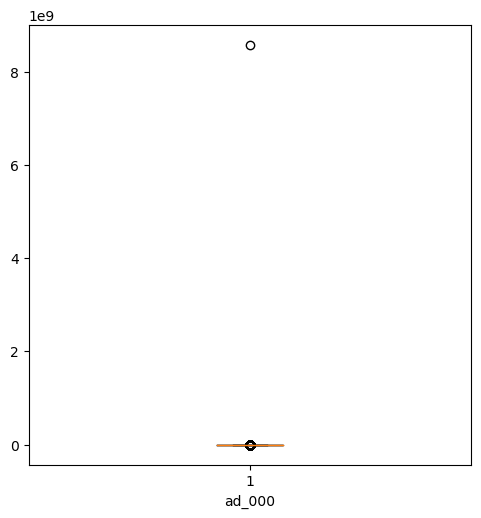

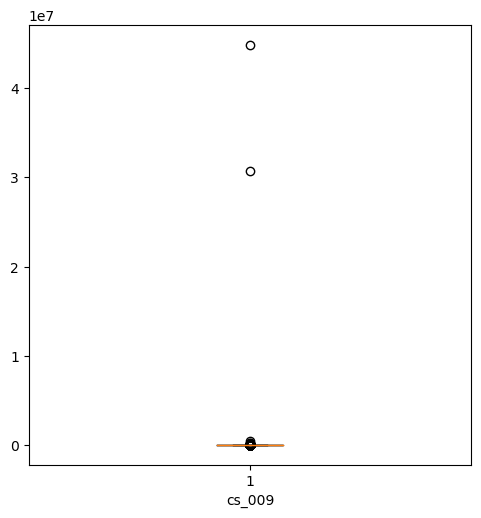

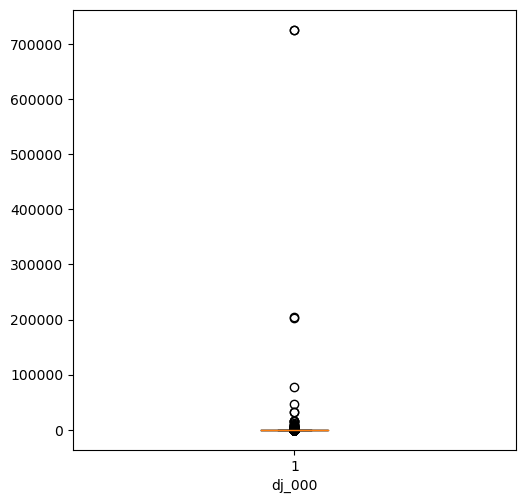

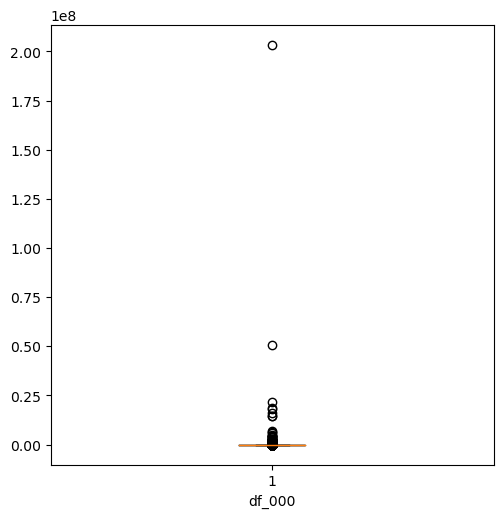

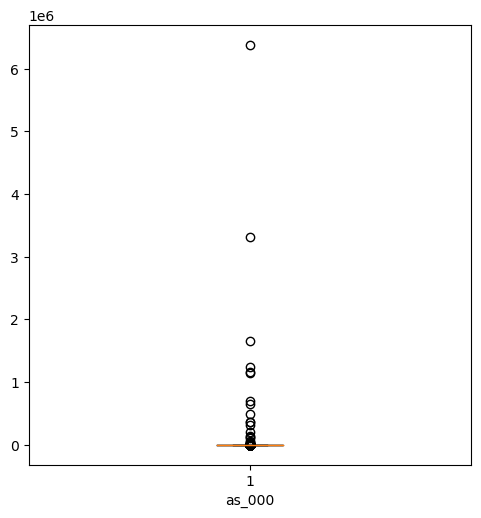

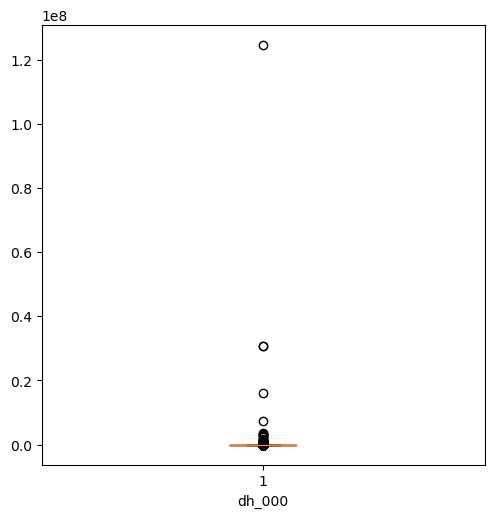

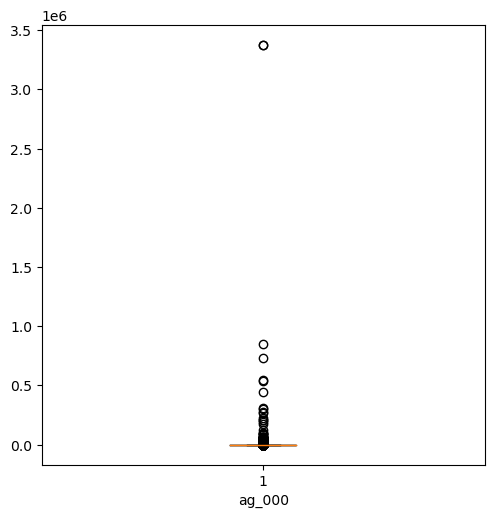

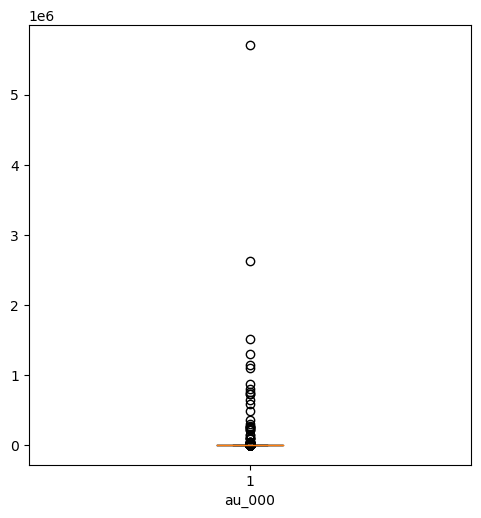

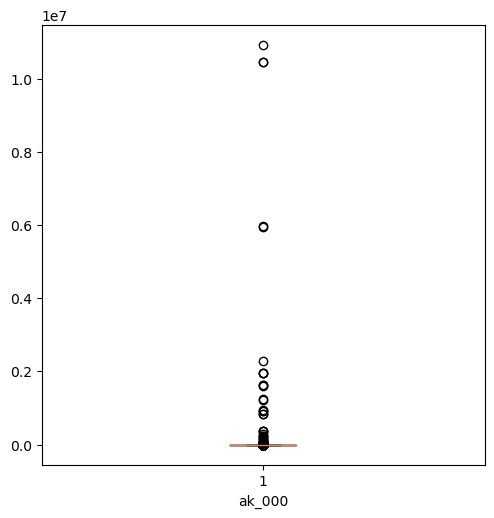

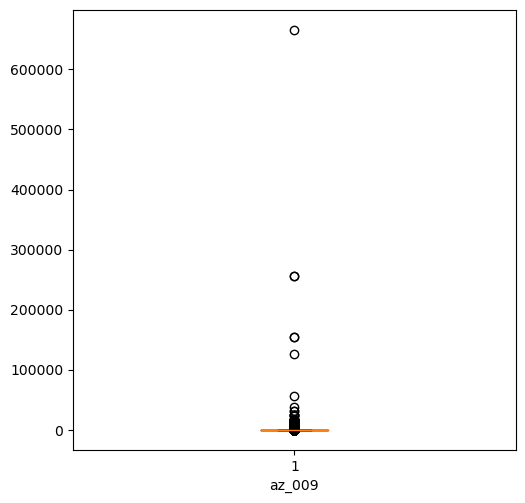

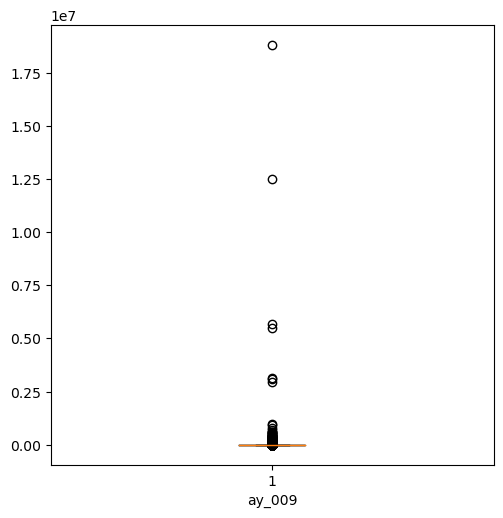

In [8]:
i=0
for col in selected_feature_names:
    i+=1
    plt.subplots(figsize=(40, 40))
    plt.subplot(6,6,i)
    plt.xlabel(col)
    plt.boxplot(data[col])

### 1.b.v Determine the number of positive and negative data. Is this data set imbalanced?

In [9]:
pos_count = len(data[data['class'] == 'pos'])
neg_count = len(data[data['class'] == 'neg'])

print("Percentage positive: ", (100*pos_count)/(pos_count+neg_count))
print("Percentage negative: ", (100*neg_count)/(pos_count+neg_count))

Percentage positive:  1.8092105263157894
Percentage negative:  98.1907894736842


From the above result, it is clear that the data set is imbalanced.

### 1.c Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error.

In [10]:
training_data['class'] = training_data['class'].apply(lambda x: 1 if x == 'pos' else 0)
test_data['class'] = test_data['class'].apply(lambda x: 1 if x == 'pos' else 0)

x_train = training_data.iloc[:,1:]
y_train = training_data['class']
x_test = test_data.iloc[:,1:]
y_test = test_data['class']

#random forest classifier model
model = RandomForestClassifier(oob_score=True)

#fitting and getting predictions
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)


Training Dataset Confusion Matrix


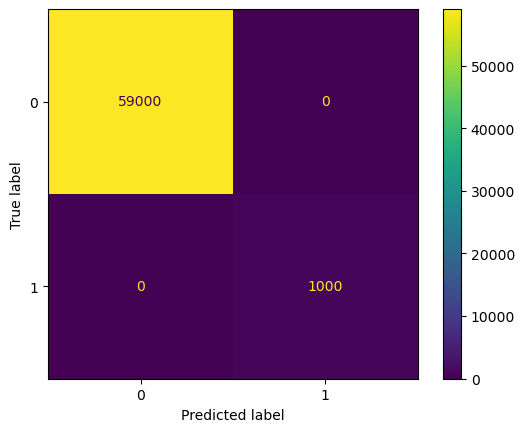

Test Dataset Confusion Matrix


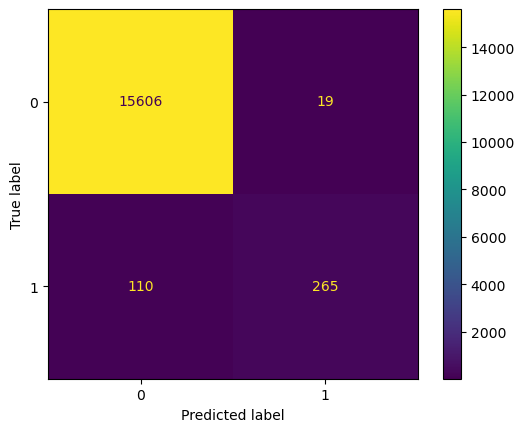

In [11]:
#confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
cm_train_display = ConfusionMatrixDisplay(confusion_matrix=cm_train)
cm_test_display = ConfusionMatrixDisplay(confusion_matrix=cm_test)

print('Training Dataset Confusion Matrix')
cm_train_display.plot()
plt.show()

print('Test Dataset Confusion Matrix')
cm_test_display.plot()
plt.show()

Training Dataset:
AUC Score: 1.0
Misclassification Rate: 0.0
Accuracy: 1.0


Test Dataset:
AUC Score: 0.8527253333333333
Misclassification Rate: 0.0080625
Accuracy: 0.9919375


Out of bag error:  0.006000000000000005
Test error:  0.0080625


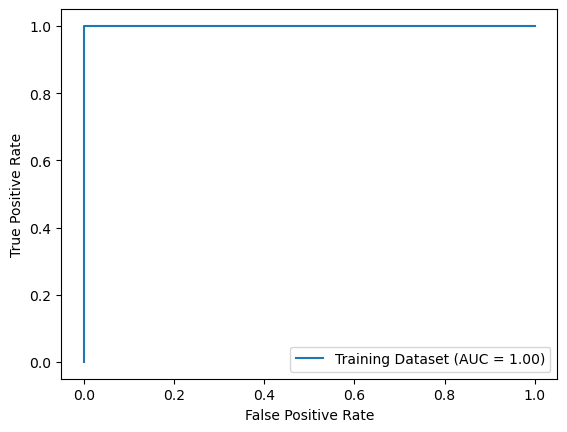

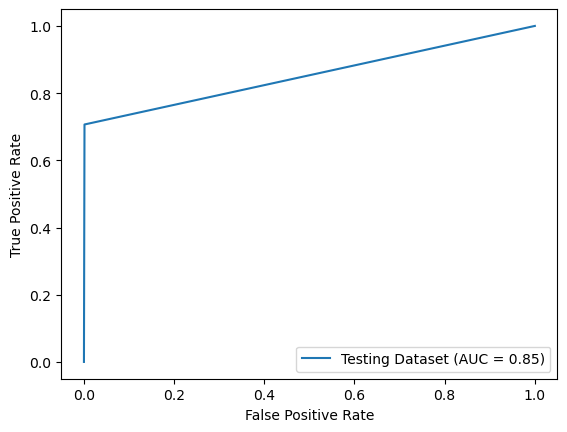

In [12]:
# misclassificaiton rate
trueNegTrain, falePosTrain, falseNegTrain, truePosTrain = cm_train.ravel()
trueNegTest, falePosTest, falseNegTest, truePosTest = cm_test.ravel()

misclassTrain = falePosTrain + falseNegTrain
totalTrain = trueNegTrain + falePosTrain + falseNegTrain + truePosTrain

misclassTest = falePosTest + falseNegTest
totalTest = trueNegTest + falePosTest + falseNegTest + truePosTest

misclassRateTrain = misclassTrain / totalTrain
misclassRateTest = misclassTest / totalTest

# roc curve and auc
(fpr_train, tpr_train, thresholds_train) = roc_curve(y_train, y_train_pred)
roc_auc_train = auc(fpr_train, tpr_train)
rocTrain = RocCurveDisplay(fpr=fpr_train, tpr=tpr_train, roc_auc=roc_auc_train, estimator_name='Training Dataset')
rocTrain.plot()

(fpr_test, tpr_test, thresholds_test) = roc_curve(y_test, y_test_pred)
roc_auc_test = auc(fpr_test, tpr_test)
rocTest = RocCurveDisplay(fpr=fpr_test, tpr=tpr_test, roc_auc=roc_auc_test, estimator_name='Testing Dataset')
rocTest.plot()

# accuracy
acc_train = model.score(x_train, y_train) 
acc_test = model.score(x_test, y_test)

# oob and test error
oob_error = 1 - model.oob_score_
test_error = mean_squared_error(y_test, y_test_pred)

# Results
print("Training Dataset:")
print("AUC Score:", roc_auc_train)
print("Misclassification Rate:", misclassRateTrain)
print("Accuracy:", acc_train)

print("\n\nTest Dataset:")
print("AUC Score:", roc_auc_test)
print("Misclassification Rate:", misclassRateTest)
print("Accuracy:", acc_test)

print("\n\nOut of bag error: ", oob_error)
print("Test error: ", test_error)

### 1.d Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 1c. Compare the results with those of 1c.

In [13]:
balancedModel = BalancedRandomForestClassifier(oob_score=True)

#fitting and getting predictions
balancedModel.fit(x_train, y_train)
y_train_pred = balancedModel.predict(x_train)
y_test_pred = balancedModel.predict(x_test)


Training Dataset Confusion Matrix


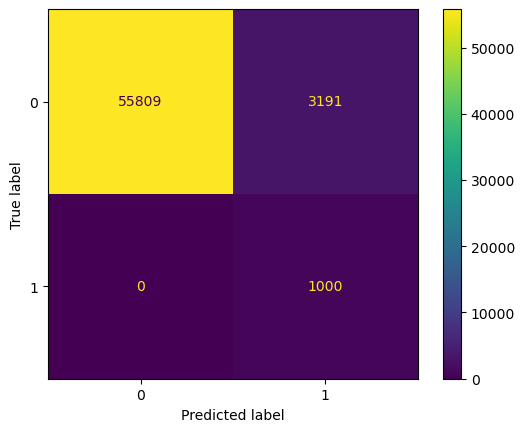

Test Dataset Confusion Matrix


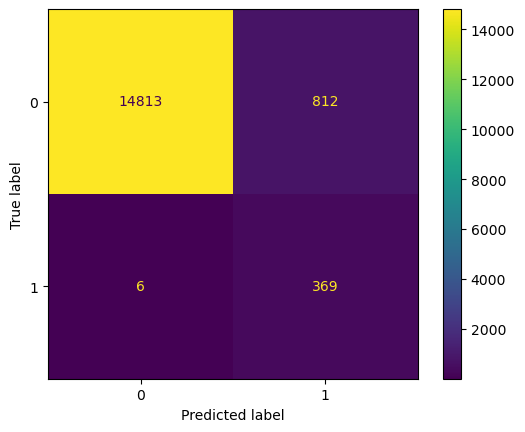

In [14]:
#confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
cm_train_display = ConfusionMatrixDisplay(confusion_matrix=cm_train)
cm_test_display = ConfusionMatrixDisplay(confusion_matrix=cm_test)

print('Training Dataset Confusion Matrix')
cm_train_display.plot()
plt.show()

print('Test Dataset Confusion Matrix')
cm_test_display.plot()
plt.show()

Training Dataset:
AUC Score: 0.9729576271186441
Misclassification Rate: 0.05318333333333333
Accuracy: 0.9468166666666666


Test Dataset:
AUC Score: 0.966016
Misclassification Rate: 0.051125
Accuracy: 0.948875


Out of bag error:  0.03311666666666668
Test error:  0.051125


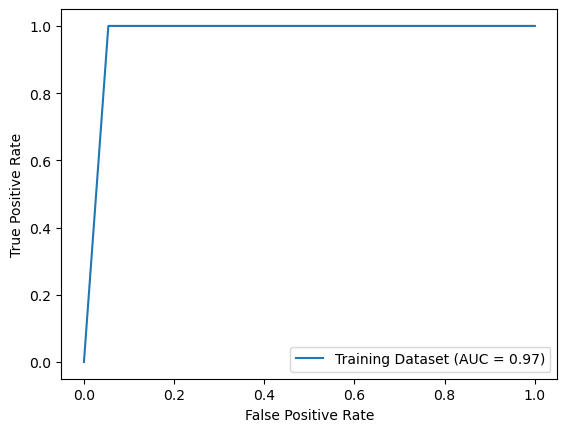

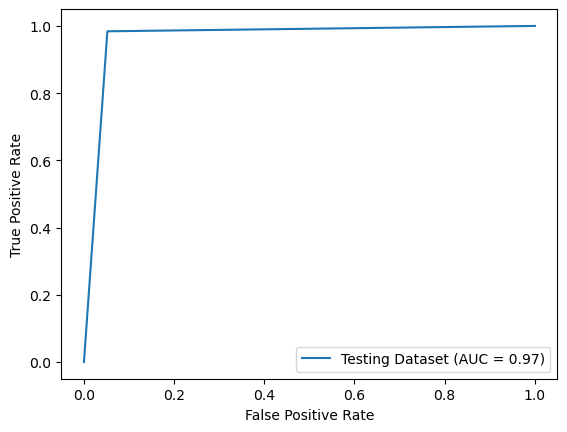

In [15]:
# misclassificaiton rate
trueNegTrain, falePosTrain, falseNegTrain, truePosTrain = cm_train.ravel()
trueNegTest, falePosTest, falseNegTest, truePosTest = cm_test.ravel()

misclassTrain = falePosTrain + falseNegTrain
totalTrain = trueNegTrain + falePosTrain + falseNegTrain + truePosTrain

misclassTest = falePosTest + falseNegTest
totalTest = trueNegTest + falePosTest + falseNegTest + truePosTest

misclassRateTrain = misclassTrain / totalTrain
misclassRateTest = misclassTest / totalTest

# roc curve and auc
(fpr_train, tpr_train, thresholds_train) = roc_curve(y_train, y_train_pred)
roc_auc_train = auc(fpr_train, tpr_train)
rocTrain = RocCurveDisplay(fpr=fpr_train, tpr=tpr_train, roc_auc=roc_auc_train, estimator_name='Training Dataset')
rocTrain.plot()

(fpr_test, tpr_test, thresholds_test) = roc_curve(y_test, y_test_pred)
roc_auc_test = auc(fpr_test, tpr_test)
rocTest = RocCurveDisplay(fpr=fpr_test, tpr=tpr_test, roc_auc=roc_auc_test, estimator_name='Testing Dataset')
rocTest.plot()

# accuracy
acc_train = balancedModel.score(x_train, y_train) 
acc_test = balancedModel.score(x_test, y_test)

# oob and test error
oob_error = 1 - balancedModel.oob_score_
test_error = mean_squared_error(y_test, y_test_pred)

# Results
print("Training Dataset:")
print("AUC Score:", roc_auc_train)
print("Misclassification Rate:", misclassRateTrain)
print("Accuracy:", acc_train)

print("\n\nTest Dataset:")
print("AUC Score:", roc_auc_test)
print("Misclassification Rate:", misclassRateTest)
print("Accuracy:", acc_test)

print("\n\nOut of bag error: ", oob_error)
print("Test error: ", test_error)

### 1.e XGBoost and Model Trees
### In the case of a univariate tree, only one input dimension is used at a tree split. In a multivariate tree, or model tree, at a decision node all input dimensions can be used and thus it is more general. In univariate classification trees, majority polling is used at each node to determine the split of that node as the decision rule. In model trees, a (linear) model that relies on all of the variables is used to determine the split of that node (i.e. instead of using Xj > s as the decision rule, one has Σj βj > s. as the decision rule). Alternatively, in a regression tree, instead of using average in the region associated with each node, a linear regression model is used to determine the value associated with that node. One of the methods that can be used at each node is Logistic Regression. Because the number of variables is large in this problem, one can use L1-penalized logistic regression at each node. You can use XGBoost to fit the model tree. Determine α (the regularization term) using cross-validation. Train the model for the APS data set without compensation for class imbalance. Use one of 5 fold, 10 fold, and leave-one-out cross validation methods to estimate the error of your trained model and compare it with the test error. Report the Confusion Matrix, ROC, and AUC for training and test sets.

In [16]:
# resetting train and test data to original
x_train = training_data.iloc[:,1:]
y_train = training_data['class']
x_test = test_data.iloc[:,1:]
y_test = test_data['class']

alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
minError = float('inf')
minAlpha = None

for alpha in alphas:
    model = xgb.XGBClassifier(reg_alpha = alpha)
    # default 5-fold     
    cv_scores = cross_val_score(model, x_train, y_train, n_jobs=-1, scoring="neg_mean_squared_error")
    sum_cv_score = sum([abs(x) for x in cv_scores])
    mean_cv_score = sum_cv_score / len(cv_scores)
    model.fit(x_train, y_train, eval_metric='logloss')
    y_test_pred = model.predict(x_test)
    
    if mean_cv_score<minError:
        minError = mean_cv_score
        minAlpha = alpha
    
    print(f'Error for alpha = {alpha} is = {mean_cv_score}')
    

print(f'\n\nHence we select alpha with value = {minAlpha} which has an error of {minError}')

Error for alpha = 0.0001 is = 0.005200000000000001
Error for alpha = 0.001 is = 0.0054
Error for alpha = 0.01 is = 0.0054666666666666665
Error for alpha = 0.1 is = 0.005383333333333334
Error for alpha = 1 is = 0.005933333333333334
Error for alpha = 10 is = 0.006083333333333334
Error for alpha = 100 is = 0.00885
Error for alpha = 1000 is = 0.016666666666666666
Error for alpha = 10000 is = 0.016666666666666666


Hence we select alpha with value = 0.0001 which has an error of 0.005200000000000001


Training Dataset Confusion Matrix


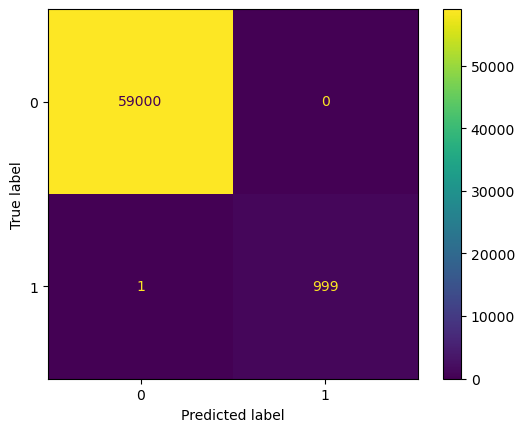

Test Dataset Confusion Matrix


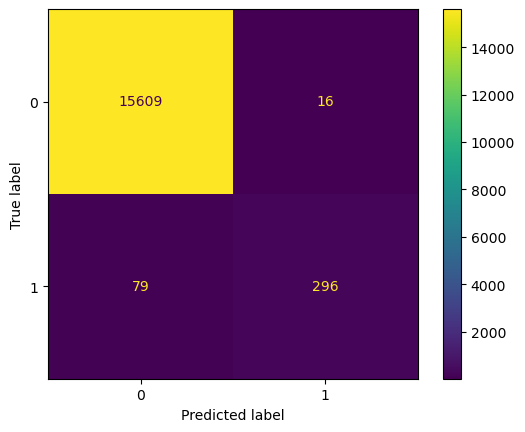

In [17]:
bestModel = xgb.XGBClassifier(reg_alpha = minAlpha)
bestModel.fit(x_train, y_train, eval_metric='logloss')

y_train_pred = bestModel.predict(x_train)
y_test_pred = bestModel.predict(x_test)

# confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
cm_train_display = ConfusionMatrixDisplay(confusion_matrix=cm_train)
cm_test_display = ConfusionMatrixDisplay(confusion_matrix=cm_test)

print('Training Dataset Confusion Matrix')
cm_train_display.plot()
plt.show()

print('Test Dataset Confusion Matrix')
cm_test_display.plot()
plt.show()

Training Dataset:
AUC Score: 0.9995
Misclassification error: 1.6666666666666667e-05
Accuracy: 0.9999833333333333


Test Dataset:
AUC Score: 0.8941546666666667
Misclassification error: 0.0059375
Accuracy: 0.9940625


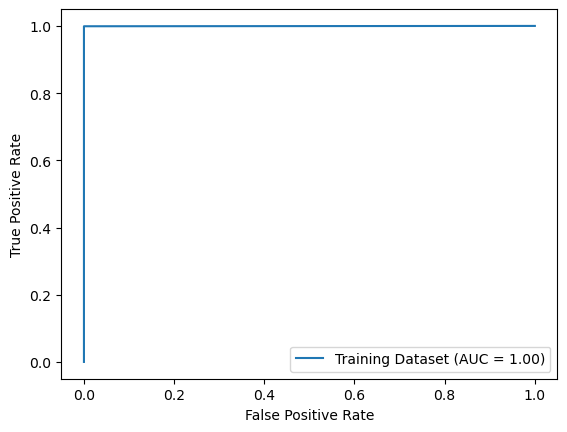

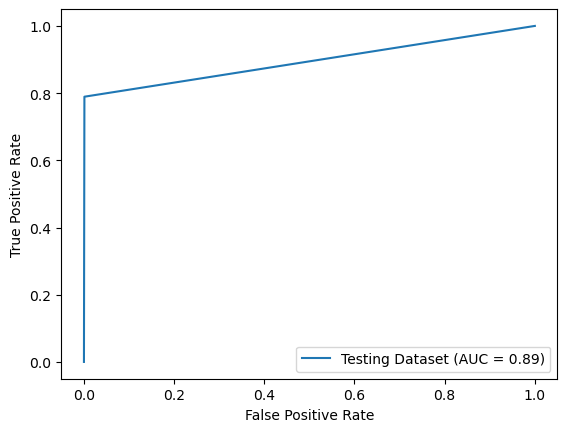

In [18]:
# misclassificaiton rate
trueNegTrain, falePosTrain, falseNegTrain, truePosTrain = cm_train.ravel()
trueNegTest, falePosTest, falseNegTest, truePosTest = cm_test.ravel()

misclassTrain = falePosTrain + falseNegTrain
totalTrain = trueNegTrain + falePosTrain + falseNegTrain + truePosTrain

misclassTest = falePosTest + falseNegTest
totalTest = trueNegTest + falePosTest + falseNegTest + truePosTest

misclassRateTrain = misclassTrain / totalTrain
misclassRateTest = misclassTest / totalTest

# roc curve and auc
(fpr_train, tpr_train, thresholds_train) = roc_curve(y_train, y_train_pred)
roc_auc_train = auc(fpr_train, tpr_train)
rocTrain = RocCurveDisplay(fpr=fpr_train, tpr=tpr_train, roc_auc=roc_auc_train, estimator_name='Training Dataset')
rocTrain.plot()

(fpr_test, tpr_test, thresholds_test) = roc_curve(y_test, y_test_pred)
roc_auc_test = auc(fpr_test, tpr_test)
rocTest = RocCurveDisplay(fpr=fpr_test, tpr=tpr_test, roc_auc=roc_auc_test, estimator_name='Testing Dataset')
rocTest.plot()

# accuracy
acc_train = bestModel.score(x_train, y_train) 
acc_test = bestModel.score(x_test, y_test)

# Results
print("Training Dataset:")
print("AUC Score:", roc_auc_train)
print("Misclassification error:", misclassRateTrain)
print("Accuracy:", acc_train)

print("\n\nTest Dataset:")
print("AUC Score:", roc_auc_test)
print("Misclassification error:", misclassRateTest)
print("Accuracy:", acc_test)

### 1.f Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance. Train XGBosst with L1-penalized logistic regression at each node using the pre-processed data and repeat 1e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE case.

In [19]:
classDist = collections.Counter(y_train)
print('Class distribution of training data before SMOTE:', classDist)
smoteOversample = SMOTE(n_jobs=-1)
x_train, y_train = smoteOversample.fit_resample(x_train, y_train)
classDist = collections.Counter(y_train)
print('Class distribution of training data after SMOTE:', classDist)

Class distribution of training data before SMOTE: Counter({0: 59000, 1: 1000})
Class distribution of training data after SMOTE: Counter({0: 59000, 1: 59000})


In [20]:
# resetting train and test data to original
x_train = training_data.iloc[:,1:]
y_train = training_data['class']
x_test = test_data.iloc[:,1:]
y_test = test_data['class']

minError = float('inf')
minAlpha = None

alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

for alpha in alphas:
    model = xgb.XGBClassifier(reg_alpha = alpha)
    smote = SMOTE(n_jobs=-1)
    pipe = imbpipeline([('smt', smote), ('xgb', model)])    
    cv_scores = cross_val_score(pipe, x_train, y_train, n_jobs=-1, scoring="neg_mean_squared_error")
    sum_cv_score = sum([abs(x) for x in cv_scores])
    error = sum_cv_score/len(cv_scores)
    
    print(f'Error for aplha = {alpha} is = {error}')

    if error<minError:
        minError = error
        minAlpha = alpha

print(f'\n\nHence we select alpha with value = {minAlpha} which has an error of {minError}')

Error for aplha = 0.0001 is = 0.006383333333333334
Error for aplha = 0.001 is = 0.006416666666666666
Error for aplha = 0.01 is = 0.006516666666666666
Error for aplha = 0.1 is = 0.006433333333333334
Error for aplha = 1 is = 0.0066500000000000005
Error for aplha = 10 is = 0.007833333333333333
Error for aplha = 100 is = 0.016683333333333335
Error for aplha = 1000 is = 0.037000000000000005
Error for aplha = 10000 is = 0.05086666666666667


Hence we select alpha with value = 0.0001 which has an error of 0.006383333333333334


Training Dataset Confusion Matrix


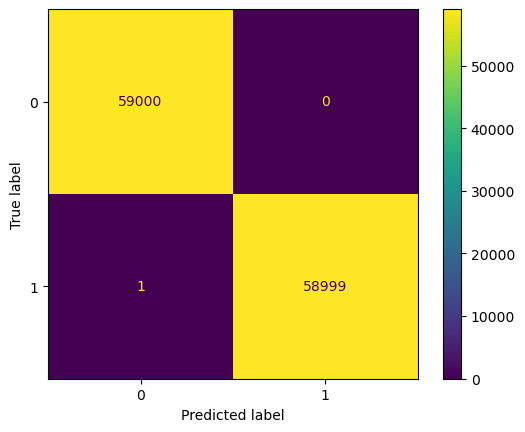

Test Dataset Confusion Matrix


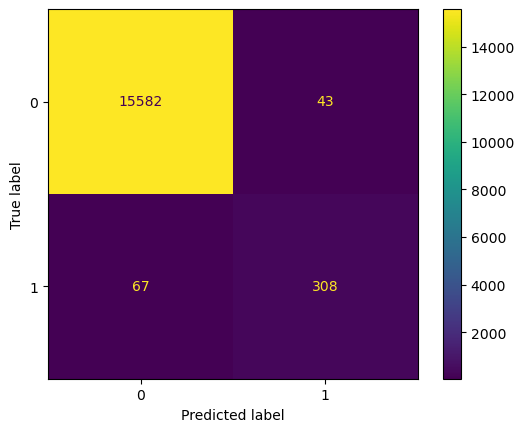

In [21]:
x_train = training_data.iloc[:,1:]
y_train = training_data['class']
x_test = test_data.iloc[:,1:]
y_test = test_data['class']

smote = SMOTE(n_jobs=-1)
x_train, y_train = smote.fit_resample(x_train, y_train)
xgbModel = xgb.XGBClassifier(reg_alpha = minAlpha)
xgbModel.fit(x_train, y_train, eval_metric='logloss')
y_train_pred = xgbModel.predict(x_train)
y_test_pred = xgbModel.predict(x_test)

# confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
cm_train_display = ConfusionMatrixDisplay(confusion_matrix=cm_train)
cm_test_display = ConfusionMatrixDisplay(confusion_matrix=cm_test)

print('Training Dataset Confusion Matrix')
cm_train_display.plot()
plt.show()

print('Test Dataset Confusion Matrix')
cm_test_display.plot()
plt.show()

Training Dataset:
AUC Score: 0.9999915254237288
Misclassification error: 8.47457627118644e-06
Accuracy: 0.9999915254237288


Test Dataset:
AUC Score: 0.9092906666666668
Misclassification error: 0.006875
Accuracy: 0.993125


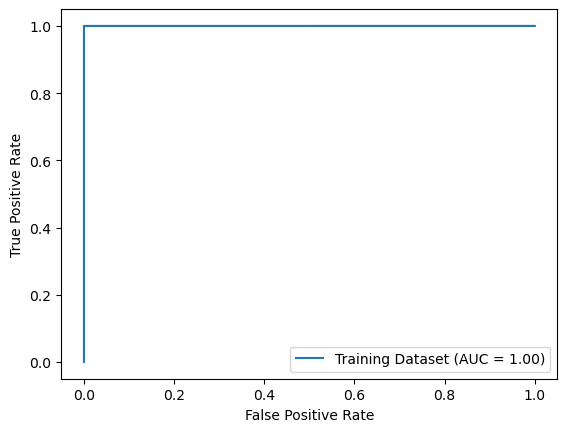

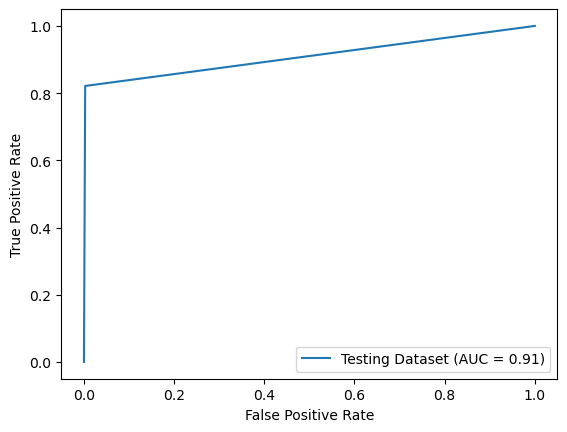

In [22]:
# misclassificaiton rate
trueNegTrain, falePosTrain, falseNegTrain, truePosTrain = cm_train.ravel()
trueNegTest, falePosTest, falseNegTest, truePosTest = cm_test.ravel()

misclassTrain = falePosTrain + falseNegTrain
totalTrain = trueNegTrain + falePosTrain + falseNegTrain + truePosTrain

misclassTest = falePosTest + falseNegTest
totalTest = trueNegTest + falePosTest + falseNegTest + truePosTest

misclassRateTrain = misclassTrain / totalTrain
misclassRateTest = misclassTest / totalTest

# roc curve and auc
(fpr_train, tpr_train, thresholds_train) = roc_curve(y_train, y_train_pred)
roc_auc_train = auc(fpr_train, tpr_train)
rocTrain = RocCurveDisplay(fpr=fpr_train, tpr=tpr_train, roc_auc=roc_auc_train, estimator_name='Training Dataset')
rocTrain.plot()

(fpr_test, tpr_test, thresholds_test) = roc_curve(y_test, y_test_pred)
roc_auc_test = auc(fpr_test, tpr_test)
rocTest = RocCurveDisplay(fpr=fpr_test, tpr=tpr_test, roc_auc=roc_auc_test, estimator_name='Testing Dataset')
rocTest.plot()

# accuracy
acc_train = xgbModel.score(x_train, y_train) 
acc_test = xgbModel.score(x_test, y_test)

# Results
print("Training Dataset:")
print("AUC Score:", roc_auc_train)
print("Misclassification error:", misclassRateTrain)
print("Accuracy:", acc_train)

print("\n\nTest Dataset:")
print("AUC Score:", roc_auc_test)
print("Misclassification error:", misclassRateTest)
print("Accuracy:", acc_test)

### 2. ISLR 6.6.3


a. iv) Steadily decreases: As s increases from zero, all the betas will increase from zero to their estimated least square values. Training error for 0 betas s is the maximum and it will decrease steadily to the original least square RSS value.

b. ii) In this case, it will decrease initially and then increase to form a U shape. At s = 0, all the beta values are zero. This model will have a high test RSS value, and as we increase s, beta s increases the test RSS decreases. As beta s approches the OLS values, the test RSS will begin to increase again.   

c. iii) Steadily increases: In this case, when s = 0, the model predicts a constant value, therefore having no varience. As s increases, the beta values will start increasing and the variance increases.

d. iv) Steadily decreases: In this case, when s = 0, the model predicts a constant, and bias is high. As s increases, more betas become significant and the bias decreases.

e. v) It will remain the same. Irreducible error is independant of the model and stays the same as s changes.

### 3. ISLR 6.6.5

a) Minimize (y1 - β1x11 - β2x12)^2 + (y2 - β1x21 - β2x22)^2 + λ(β1^2 + β2^2)

b) For this optimization, we need to take the derivative of the above equation with respect to β1 and β2 and equate to zero. 

Let x11 = x12 = -x21 = -x22 = x 
Let y1 = -y2 = y

On making the above subsitution in the previous equation, we get:

2(y-x(β1+β2))^2 + λ(β1^2 + β2^2)

Take derivative of of the above wrt β1 and β2 and equate to zero. 

2λβ1 = 4x(y-x(β1+β2))
and
2λβ2 = 4x(y-x(β1+β2))

Hence proved: β1 = β2

c) Minimize (y1 − β1x11 − β2x12)^2 + (y2 − β1x21 − β2x22)^2 + λ(|β1|+|β2|)

d) Lasso contraint: |β1|+|β2| < s
Plotting this will take a shape of a diamond which is centered at the origin.

Considering the constraint from c

We know that 
x11=x12
x21=x22
x11+x21=0
x12+x22=0
y1+y2=0

Thus, simplifying we get:
Minimize: 2(y1−(β1+β2)x11)^2

This problem has a solution β1+β2 = y1/x11. This is a line parallel to one the edges of the diamond formed by the lasso constraint β1+β2 = s.

On solving, β1+β2 = s is a potential solution to the lasso optimization problem.
Similarly, we can show that β1+β2 = -s is also a solution.

Thus, it is proven that the lasso problem does not have a unique solution. The solution can be represented by the two line segments

β1+β2 = s
β1 >= 0
β2 >= 0

and

β1+β2 = -s
β1 <= 0
β2 <= 0

### 4. ISLR 8.4.5

Majority Approach: Since the number of red predictors is larger than green predictors, based on the majority approach, the final class will be red.

Average Approach: Since the average is less than 0.5 (0.45), the final class will be green.



### 5. ISLR 9.7.3 

a.

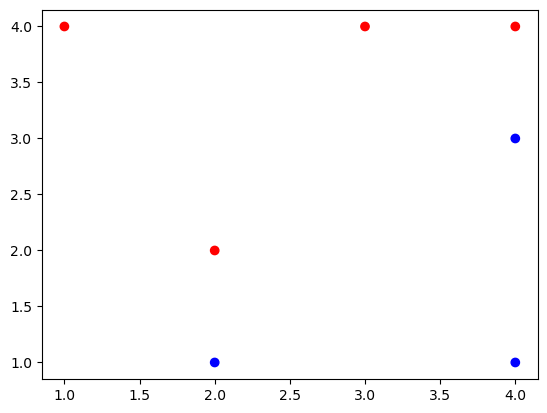

In [23]:
x1 = [3, 2, 4, 1, 2, 4, 4]
x2 = [4, 2, 4, 4, 1, 3, 1]
colors = ["red", "red", "red", "red", "blue", "blue", "blue"]
plt.scatter(x1, x2, c=colors)
plt.show()

b. From the above graph, we can tell that maximal margin classifier has to be in between observations 2, 3 and 5, 6.

Hence it is a line that passes thorugh the points (2, 1.5) and (4, 3.5) (taking the midpoints). The equation of such a line would be X1−X2−0.5=0.

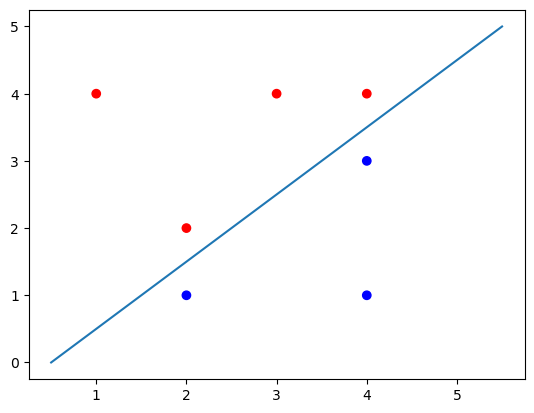

In [24]:
plt.scatter(x1, x2, c=colors)
x11 = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
x22 = [0, 1, 2, 3, 4, 5]
plt.plot(x11, x22)
plt.show()

c. The classification rule is Red if X1−X2−0.5<0, else blue

d.

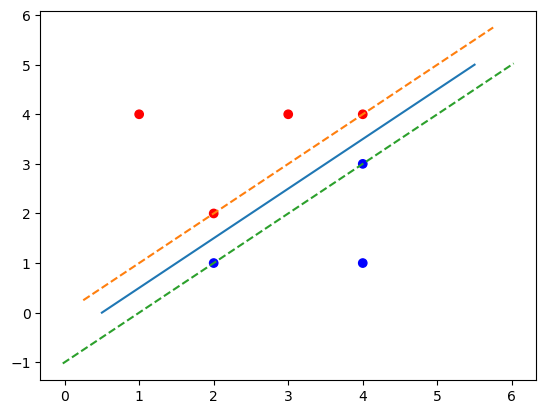

In [25]:
plt.scatter(x1, x2, c=colors)
x11 = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
x22 = [0, 1, 2, 3, 4, 5]
plt.plot(x11, x22)

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0 + 1 * x_vals
plt.plot(x_vals, y_vals, '--')

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = -1 + 1 * x_vals
plt.plot(x_vals, y_vals, '--')

plt.show()

e. The support vectors are at the points: (2,1), (2,2), (4,3) and (4,4)

f. By studying the plot, it is evident that if the obseravtion (4,1) was moved, it would not affect the maximal margin hyperplan as it is not one of the support vectors.

g. For example, the hyperplane which equation is X1−X2−0.4=0 is not the optimal separating hyperplane.

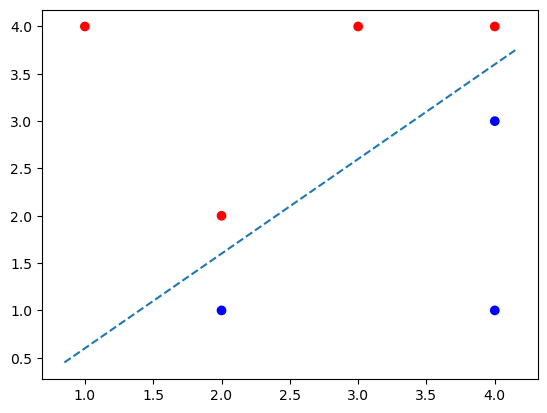

In [26]:
plt.scatter(x1, x2, c=colors)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = -0.4 + 1 * x_vals
plt.plot(x_vals, y_vals, '--')
plt.show()

h. When a red point (4,2) is added to the plot, the two classes are obviously not separable by a hyperplane anymore.

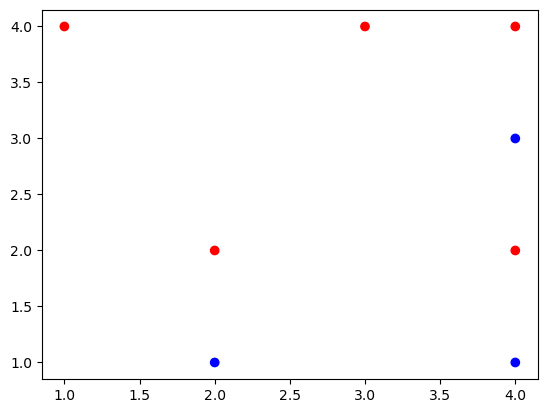

In [27]:
x1cp = x1[::]
x2cp = x2[::]
colorscp = colors[::]
colorscp.append('red')
x1cp.append(4)
x2cp.append(2)

plt.scatter(x1cp, x2cp, c=colorscp)
plt.show()